# The Generalized frequency-Hough transform tutorial
## Searching for inspiraling primordial black holes, mini-EMRI systems, or binary neutron star inspirals
Andrew L. Miller

National Institute for Subatomic Physics / Utrecht University

Two objects in a binary system that are far enough away from merging will emit gravitational waves as they inspiral towards one another. Depending upon the masses of these systems, and their orbital frequencies, these objects could inspiral for hours-years, which falls into the gap between burst-like mergers of binary neutron star and black holes, and forever-lasting continuous gravitational waves from asymmetrically rotating neutron stars.

This tutorial will focus on a particular algorithm to search for planetary-mass primordial black holes: the Generalized frequency-Hough transform. This method maps points in the time/frequency plane of the detector to lines in the frequency/chirp mass plane of the source.

See arXiv:1810.09784 , arXiv:2012.12983, arXiv:2205.10359 and arXiv:2309.15808 for more details on the application of this method to quickly spinning down neutron stars, planetary-mass primordial black hoels, mini-EMRI systems, and binary neutron star inspirals in Einstein Telescope, respectively.

For some original Hough papers, see arXiv:1407.8333, https://arxiv.org/abs/gr-qc/0407001.

# Install octave and others, import package to run octave from python

Octave is only necessary to inject the signals and create the matrix containing the time/frequency peakmap. Python functions work to actually peform the Generalized frequency-Hough transform.

Note: it could take 5-10 minutes to install everything, download the data, and and do the injection.

In [1]:
!apt install octave
!pip install oct2py
!pip install pyhough
!pip install pyfstat

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  aglfn default-jre-headless epstool fonts-droid-fallback fonts-freefont-otf
  fonts-noto-mono fonts-urw-base35 ghostscript gnuplot-data gnuplot-qt gsfonts
  imagemagick-6-common info install-info libamd2 libauthen-sasl-perl libbtf1
  libcamd2 libccolamd2 libcholmod3 libclone-perl libcolamd2 libcombblas1.16.0
  libcxsparse3 libdata-dump-perl libemf1 libencode-locale-perl libevdev2
  libfftw3-double3 libfftw3-long3 libfftw3-mpi3 libfftw3-single3
  libfile-listing-perl libfltk-gl1.3 libfltk1.3 libfont-afm-perl libglpk40
  libglu1-mesa libgraphicsmagick++-q16-12 libgraphicsmagick-q16-3 libgs9
  libgs9-common libgudev-1.0-0 libhdf5-openmpi-103-1 libhtml-form-perl
  libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl
  libhtml-tree-perl libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl
  libhttp-message-perl libhttp-negotiate-

In [ ]:
from oct2py import Oct2Py
oc = Oct2Py()
import pyhough
from pyhough import pm
from pyhough import gfh
from pyhough import physics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/pyfstat/core.py:13: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


# Clone a git repo with all the Generalized frequency-Hough codes

In [ ]:
!rm -rf ./gfh/ ## this is to ensure you install the latest repo
!git clone https://git.ligo.org/andrewlawrence.miller/gfh.git
oc.addpath(oc.genpath('./gfh/'))

Cloning into 'gfh'...
remote: Enumerating objects: 3459, done.
remote: Counting objects: 100% (360/360), done.
remote: Compressing objects: 100% (358/358), done.
remote: Total 3459 (delta 209), reused 0 (delta 0), pack-reused 3099
Receiving objects: 100% (3459/3459), 25.72 MiB | 10.21 MiB/s, done.
Resolving deltas: 100% (602/602), done.
    _pyeval at line 57 column 30

    _pyeval at line 57 column 30



'.:/usr/local/lib/python3.10/dist-packages/oct2py:/usr/local/lib/python3.10/dist-packages/octave_kernel:/usr/lib/x86_64-linux-gnu/octave/6.4.0/site/oct/x86_64-pc-linux-gnu:/usr/lib/x86_64-linux-gnu/octave/site/oct/api-v56/x86_64-pc-linux-gnu:/usr/lib/x86_64-linux-gnu/octave/site/oct/x86_64-pc-linux-gnu:/usr/share/octave/6.4.0/site/m:/usr/share/octave/site/api-v56/m:/usr/share/octave/site/m:/usr/share/octave/site/m/startup:/usr/lib/x86_64-linux-gnu/octave/6.4.0/oct/x86_64-pc-linux-gnu:/usr/share/octave/6.4.0/m:/usr/share/octave/6.4.0/m/audio:/usr/share/octave/6.4.0/m/deprecated:/usr/share/octave/6.4.0/m/elfun:/usr/share/octave/6.4.0/m/general:/usr/share/octave/6.4.0/m/geometry:/usr/share/octave/6.4.0/m/gui:/usr/share/octave/6.4.0/m/help:/usr/share/octave/6.4.0/m/image:/usr/share/octave/6.4.0/m/io:/usr/share/octave/6.4.0/m/java:/usr/share/octave/6.4.0/m/legacy:/usr/share/octave/6.4.0/m/linear-algebra:/usr/share/octave/6.4.0/m/miscellaneous:/usr/share/octave/6.4.0/m/ode:/usr/share/octave/

# Download a data file, the short fast Fourier transform database (SFDB)

This data file is a collection of interlaced, windowed 1024-s fast Fourier transforms of about one day of strain data.

Simulated signals in this tutorial will be injected into this data.

In [ ]:
import gdown

file_id = "1-E1ZL4mVgwfuEaYLv5AghQvSuKfocmJ8"
url = f"https://drive.google.com/uc?id={file_id}"

output = "H1:DCS-CALIB_STRAIN_GATED_SUB60HZ_C01_20190408_024000.SFDB09"

gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1-E1ZL4mVgwfuEaYLv5AghQvSuKfocmJ8
From (redirected): https://drive.google.com/uc?id=1-E1ZL4mVgwfuEaYLv5AghQvSuKfocmJ8&confirm=t&uuid=355600db-c17c-4478-b186-60a6524d02f7
To: /content/H1:DCS-CALIB_STRAIN_GATED_SUB60HZ_C01_20190408_024000.SFDB09
100%|██████████| 3.38G/3.38G [00:39<00:00, 86.4MB/s]


'H1:DCS-CALIB_STRAIN_GATED_SUB60HZ_C01_20190408_024000.SFDB09'

# Choose injection and analysis parameters

The injection will have the form:
\begin{equation}
\dot{f}_{\rm gw}=\frac{96}{5}\pi^{8/3}\left(\frac{G{M_c}}{c^3}\right)^{5/3} f_{\rm gw}^{11/3} \equiv k f^{11/3}, \tag{1}
\end{equation}

where $\dot{f}_{\rm gw}$ is the rate of change of the frequency w.r.t. time, $M_c\equiv\frac{(m_1m_2)^{3/5}}{(m_1+m_2)^{1/5}}$ is the chirp mass of the system, and $f_{\rm gw}$ is the GW frequency

and, integrating over time:

\begin{equation}
f_{\rm gw}(t)=f_0\left[1-\frac{8}{3}kf_0^{8/3}(t-t_0)\right]^{-\frac{3}{8}}~\tag{2}
\end{equation}

where $f_0$ is the GW frequency at the time $t_0$

In [ ]:
minf = 150 ### mininum frequency of the band to analyze; this is also the injected freq by def
maxf = 190 ### maximum frequency of the band to analyze
mc = 1e-2 ### chirp mass of the signal
white_noise = 1 ## 1: white noise; 0: real noise
amp = 1e-22 # signal amplitude
sig_type = 'power_law' # type of signal to inject. Please keep as 'power_law'
meth = 'gfh' # method to apply. Please keep as 'gfh'
t00 = 1238777856+12500 # time to start extracting data from, in GPS seconds
sfdbdir = './' # directory where the SFDB downloads to
Nsig = 1 # number of signals to inject. Please keep at 1
n = 11/3 # braking index n in \dot{f} = k f^n; can take on any value
ref_perc_time = 0.5 # reference time for the Generalized frequency-Hough transform;
# 0.5 indicates that f0 will be calculated at the middle of the observation time
# 0 would indicate at the beginning; 1 would indicate at the end

In [ ]:
t0 = oc.gps2mjd(t00) ## convert GPS time to MJD
fdotmin=oc.calc_fdot_chirp(mc,minf); # calculate minimum fdot
fdotmax=oc.calc_fdot_chirp(mc,maxf); # calculate maximum fdot
sour = oc.gen_N_power_law_sigs(Nsig,minf,minf,fdotmin,fdotmin,n,n,amp,t0); # generate sour struct to inject
t1=oc.calc_time_to_coalescence(mc,minf); # time left to coalesence at minf
t2=oc.calc_time_to_coalescence(mc,maxf); # time left to coalesence at maxf
dur=oc.floor(t1-t2); # duration analyzed
TFFT=oc.round(1/oc.sqrt(fdotmax)) # confine all frequency modulations to 1 freq bin in each FFT

# Make the time/frequency "peakmap"

This peakmap is essentailly a spectrogram on which we have applied a threshold, and selected only local maxes in each FFT.

The FFT length is chosen by ensuring that the spin-up induced by the inspiral of two objects is confined to one frequency bin in each $T_{\rm FFT}$:

\begin{equation}
\dot{f}T_{\rm FFT} \lesssim \frac{1}{T_{\rm FFT}}
\end{equation}

In [ ]:
peakmap = oc.inject_power_law_signal(sour,[minf, maxf],t00,dur,TFFT,sfdbdir,'power_law',white_noise);

chosen file
ans = H1:DCS-CALIB_STRAIN_GATED_SUB60HZ_C01_20190408_024000.SFDB09
calculating dsfact
f_band_you_want = 40
num_tot_ffts = 3
shitt
master_piahead =

  scalar structure containing the fields:

    eof = 0
    endian = 1
    detector = 2
    gps_sec = 1238789906
    gps_nsec = 0
    tbase = 1024
    firstfrind = 0
    nsamples = 2097152
    red = 128
    typ = 2
    n_flag = -1
    einstein = 9.999999682655225e-21
    mjdtime = 58581.84592592593
    nfft = 1325
    wink = 5
    normd = 7.629394531250000e-06
    normw = 1.206618905067444
    frinit = 0
    tsamplu = 2.441406250000000e-04
    deltanu = 9.765625000000000e-04
    vx_eq = 2.939266659990203e-05
    vy_eq = -8.585446990009374e-05
    vz_eq = -3.764287885977011e-05
    px_eq = -474.7298167901222
    py_eq = -141.6566072800092
    pz_eq = -61.41247919425324
    n_zeroes = 12632064
    sat_howmany = 0
    spare1 = 0
    spare2 = 0
    spare3 = 0
    spare4 = 0.752929687500000
    spare5 = 0
    spare6 = 0
    lavesp = 1

# Plot the peakmap

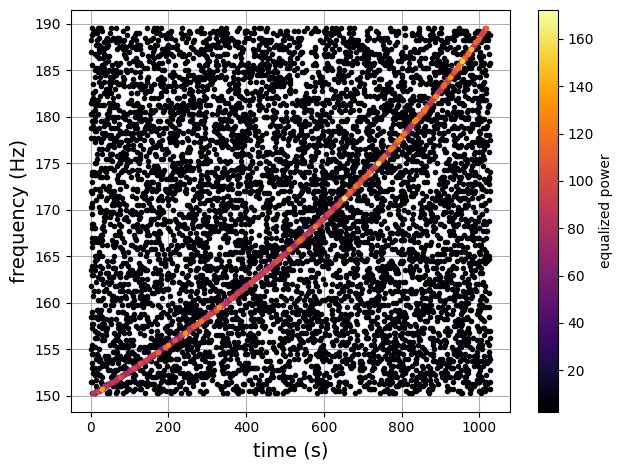

In [ ]:
p = peakmap.peaks; ## the peakmap
pyhough.pm.python_plot_triplets((p[0,:]-p[0,0])*86400,p[1,:],p[2,:],'.',label='equalized power')
plt.xlabel('time (s)',size=14)
plt.ylabel('frequency (Hz)',size=14);
plt.tight_layout()
plt.savefig('pm_pbh_inj.png',format='png',dpi=400)

# "Linearizing" the peakmap

The GFH can find power-law tracks in the time/frequency plane, but a transformation that linearizes that track is necessary.

\begin{equation}
x = f^{1-n} \text{ and } x_0=f_0^{1-n} \tag{3}
\end{equation}

Then, substituting Eq. 3 in to Eq.2, we obtain:

\begin{equation}
x = x_0 + k(n-1)(t-t_0) \tag{4}
\end{equation}

We have kept $n$ general here, since the Generalized frequency-Hough works for any $n$.

We can see this linearization implemented below. The "curvy" signal in time/frequency becomes a linear signal in the $t$/$x$ plane.

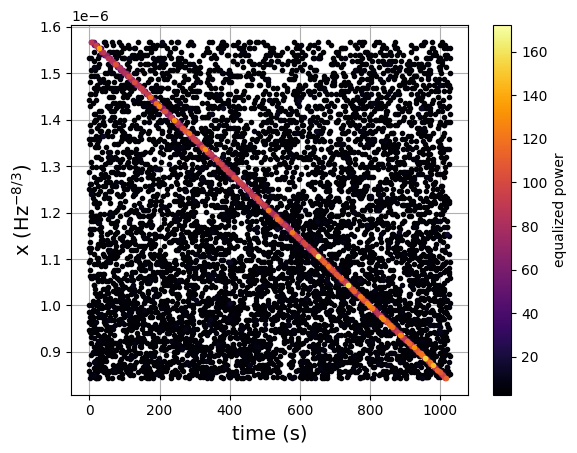

In [ ]:
peaks_in_x = 1 / p[1,:]**(n-1) # Eq. 3
pyhough.pm.python_plot_triplets((p[0,:]-p[0,0])*86400,peaks_in_x,p[2,:],'.',label='equalized power')
plt.xlabel('time (s)',size=14)
plt.ylabel(r'x (Hz$^{-8/3}$)',size=14);

# Construct the grid in $k$

The generalized Frequency-Hough maps points in time/$x$ to lines in $x_0/k$ as in Eq. 4. Thus, we actually take the peaks in the peakmap, and solve for $x_0$, for different values of $k$:

\begin{equation}
x_0 = x-k(n-1)(t-t_0)
\end{equation}

To do this, we need to specify what values of $k$ to use. We want to ensure that if we move from $k$ to $k+dk$, that the signal power is confined to one frequency bin. Thus, using Eq. 1, we can derive the following equation for $dk$:

\begin{equation}
dk=k\left( \left(1+\frac{\delta f}{f_{\rm 0,max}}\right)^{-n}-1\right)
\end{equation}
where $\delta f = 1/T_{\rm FFT}$ is the frequency bin size, $T_{\rm FFT}$ is the FFT length, and $f_{\rm 0,max} is the maximum frequency of the band analyzed.

We also create a structure called $\texttt{hm_job}$ that stores relevant information to be used in the GFH.

In [ ]:
gridk,dk = pyhough.gfh.andrew_long_transient_grid_k(TFFT,[minf, maxf],[fdotmin, fdotmax],dur,n);
gridk = np.squeeze(gridk)
gridk = np.squeeze(pyhough.gfh.cbc_shorten_gridk(gridk,sour['kn'],sour['kn']))
hm_job = pyhough.gfh.make_hm_job_struct(minf,maxf,TFFT,dur,n,ref_perc_time,gridk)

# Run the Generalized frequency-Hough and plot the Hough map

The input is the time/frequency peakmap, which is simply a collection of ones. Thus, the Hough sums ones along the time/frequency tracks of the signals, NOT the equalized power on the color axis that is seen in the peakmap plots

The output of this code $\texttt{hmap}$ is a 2-dimensional histogram in the $x_0$/$k$ plane of the source.

In [ ]:
hmap,info = pyhough.gfh.hfdf_hough_transients(p, hm_job)

chirp, flipping spindowns to spinups


(1.1e-06, 1.3e-06)

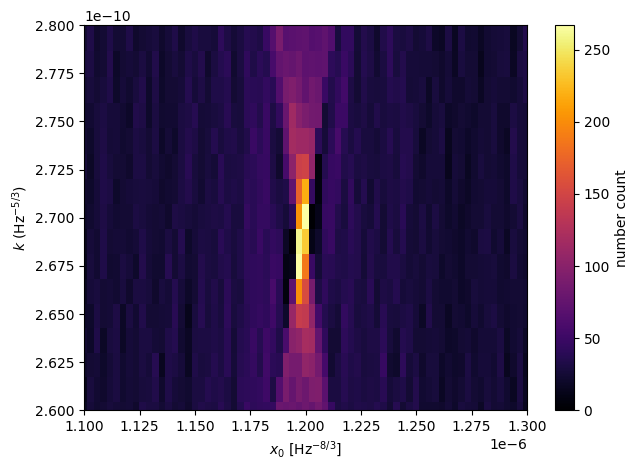

In [ ]:
fig, ax = plt.subplots()
ax.set(ylabel="$k$ (Hz$^{-5/3}$)", xlabel=r"$x_0$ [Hz$^{-8/3}$]")
c = ax.pcolormesh(
    info['gridx'],
    np.squeeze(info['gridk']),
    hmap,
    cmap="inferno",
    shading="nearest",
)
fig.colorbar(c, label="number count")
plt.tight_layout()
plt.ylim([2.6e-10,2.8e-10])
plt.xlim([1.1e-6,1.3e-6])

# Plot Hough map in physical quantities

We can transform from $x_0$/$k$ back to $f_0$/$M_c$ with the same equations written above.

Note that the frequency $f_0$ is the frequency of the signal at the middle of the observation time, not the beginning, because of our choice of $\texttt{ref_perc_time=0.5}$.

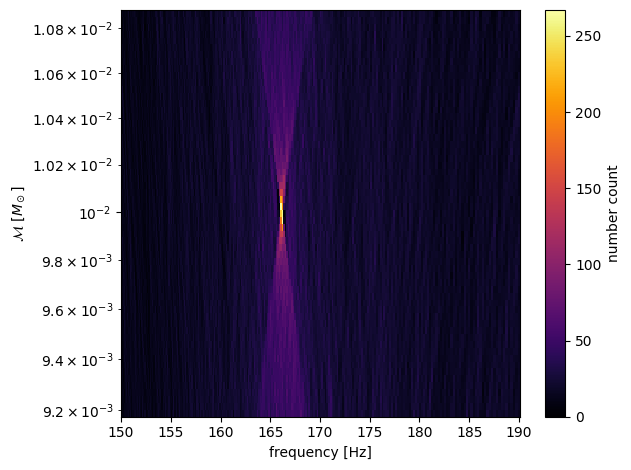

In [ ]:
mcsss = pyhough.physics.calc_mc_with_k(info['gridk'])
fffss = pyhough.gfh.get_f0_from_x0(info['gridx'],n)
fig, ax = plt.subplots()#figsize=(0.8 * 16, 0.8 * 9))
ax.set(ylabel=r"$\mathcal{M}$ $[M_\odot]$", xlabel=r"frequency [Hz]")
c = ax.pcolormesh(
    fffss,
    np.squeeze(mcsss),
    hmap,
    cmap="inferno",
    shading="nearest",
)
fig.colorbar(c, label="number count")
plt.yscale('log')
plt.tight_layout()
plt.savefig('hm_pbh_inj.png',dpi=400)